In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

url to the dataset: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

Source:

Data Source :http://data.seoul.go.kr/
SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

In [ ]:
cols = ['Bike count', 'Hour', 'temp', 'Humidity', 'Wind', 'Visibility', 'Dew_pt_temp', 'radiation', 'Rain', 'Snow', 'Functional']
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1').drop(['Date', 'Holiday', 'Seasons'], axis=1) 
df.columns = cols
df['Functional'] = (df['Functional'] == 'Yes').astype(int)

In [ ]:
df = df[df['Hour'] == 12]
df = df.drop(['Hour'], axis=1)

In [ ]:
df.head()

,Bike count,temp,Humidity,Wind,Visibility,Dew_pt_temp,radiation,Rain,Snow,Functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [ ]:
df = df.drop(['Wind', 'Visibility', 'Functional'], axis=1)

In [ ]:
df.head()

,Bike count,temp,Humidity,Dew_pt_temp,radiation,Rain,Snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


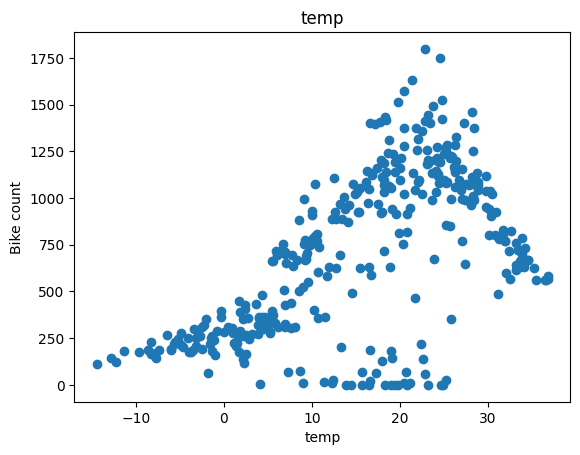

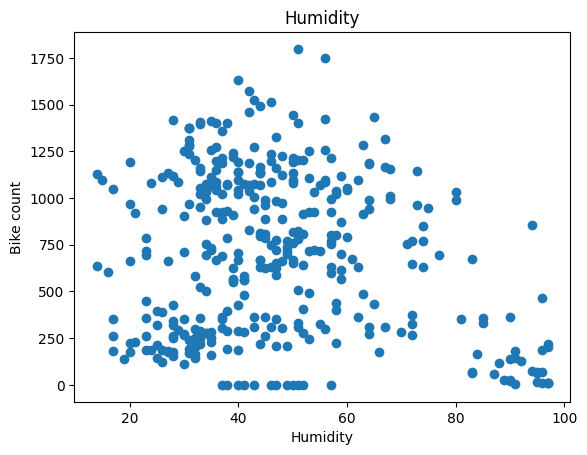

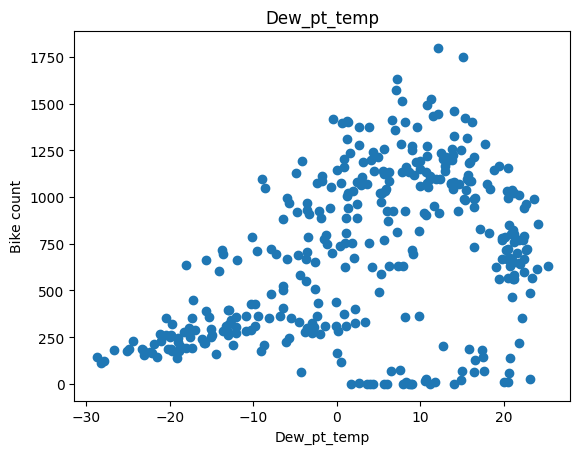

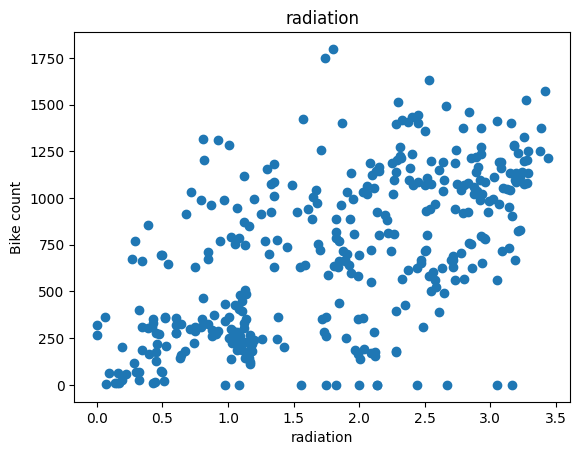

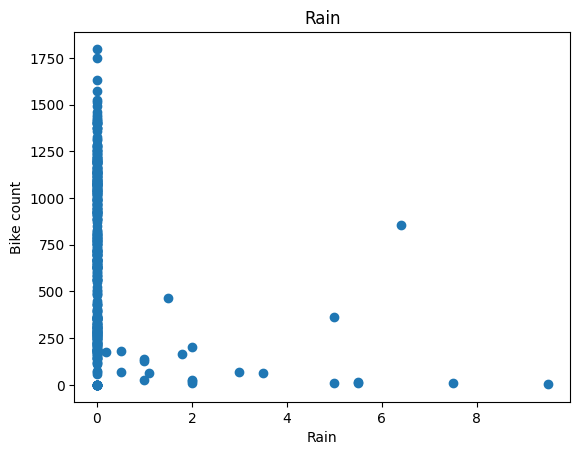

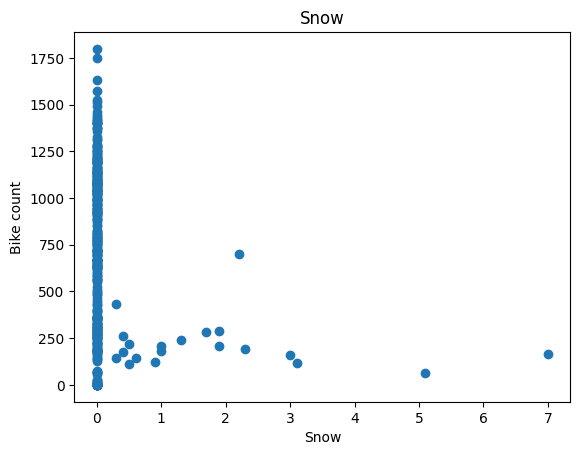

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['Bike count'])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Bike count')
  plt.show()

# train/ valid/ test datasets

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))
  return data, X, y

In [ ]:
_, x_train_temp, y_train_temp = get_xy(train, 'Bike count', x_labels=['temp'])
_, x_val_temp, y_val_temp = get_xy(val, 'Bike count', x_labels=['temp'])
_, x_test_temp, y_test_temp = get_xy(test, 'Bike count', x_labels=['temp'])

In [ ]:
reg_temp = LinearRegression()
reg_temp.fit(x_train_temp, y_train_temp)

LinearRegression()

In [ ]:
print(reg_temp.coef_, reg_temp.intercept_)

[[21.26674845]] [350.22057091]


In [ ]:
# get R square metric
reg_temp.score(x_test_temp, y_test_temp)   # since this is not 0 that means that there is maybe an association between x(temperature) and y (bike count). But the closer this value is to 1 the better it is.

0.23292305373966993

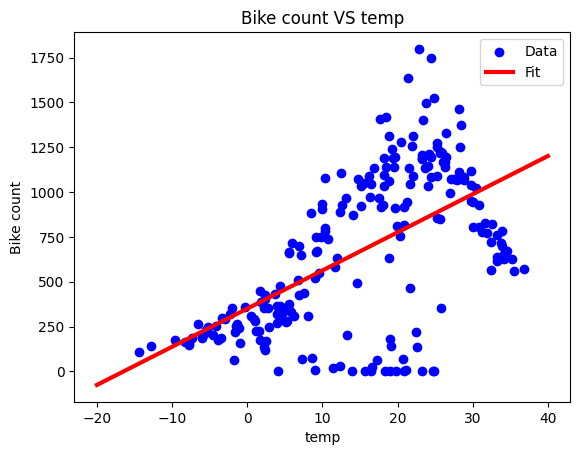

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, reg_temp.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bike count VS temp')
plt.xlabel('temp')
plt.ylabel('Bike count')
plt.show()

# Multiple linear regression:

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, x_train_all, y_train_all = get_xy(train, 'Bike count', x_labels=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val, 'Bike count', x_labels=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, 'Bike count', x_labels=df.columns[1:])

In [ ]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(x_train_all, y_train_all)

0.4646671566763022

# Regression with Neural Net:

In [ ]:
def plot_loss(histoy):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None) # ??????
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [ ]:
history = temp_nn_model.fit(x_train_temp.reshape(-1), y_train_temp, verbose=0, epochs=1000, validation_data=(x_val_temp, y_val_temp))

# what is the meaning of "epoch"???????

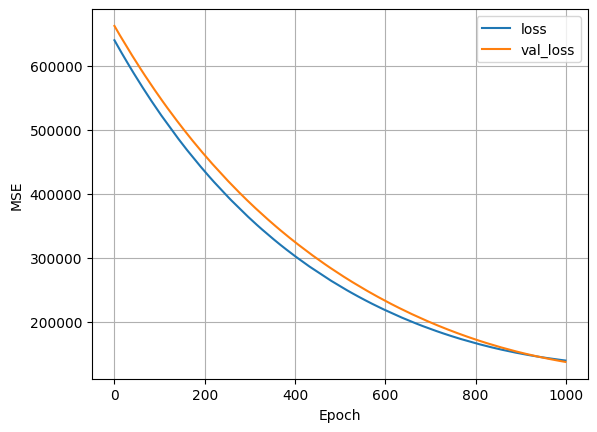

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


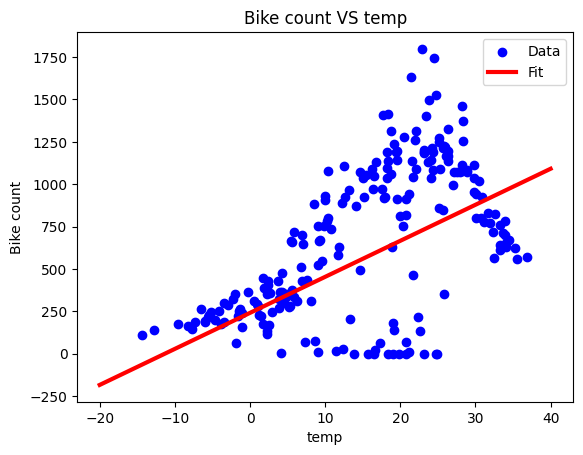

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bike count VS temp')
plt.xlabel('temp')
plt.ylabel('Bike count')
plt.show()

# Neural net:

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None) # ??????
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [ ]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
nn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(x_train_temp.reshape(-1), y_train_temp, verbose=0, epochs=100, validation_data=(x_val_temp, y_val_temp))

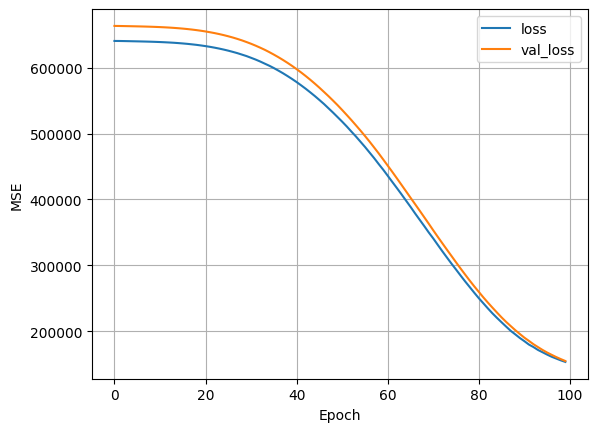

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 7ms/step


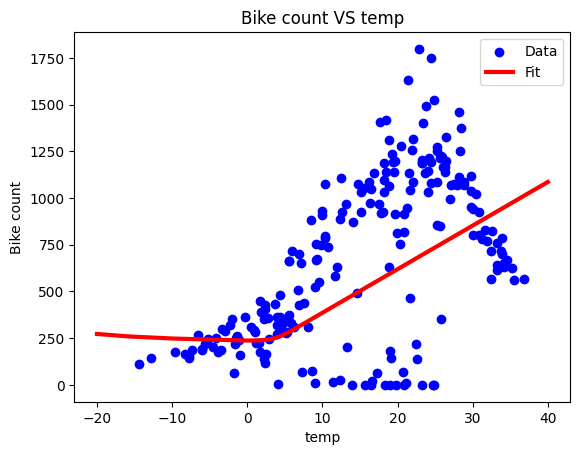

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bike count VS temp')
plt.xlabel('temp')
plt.ylabel('Bike count')
plt.show()